In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)

print(data.head())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


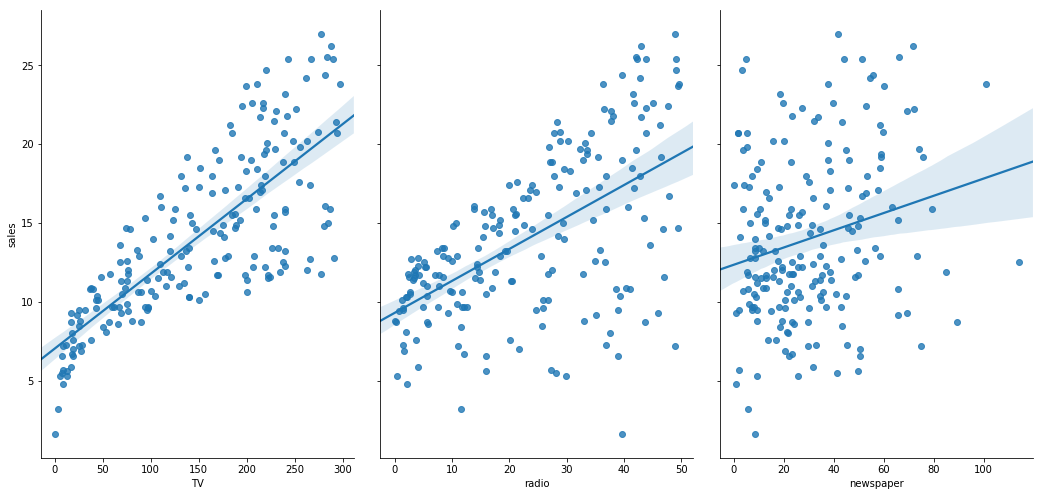

In [2]:
sns.pairplot(data, x_vars=["TV", "radio", "newspaper"], y_vars="sales", height=7, aspect=0.7, kind="reg")

In [3]:
feature_names = ["TV", "radio", "newspaper"]

X = data[feature_names]
y = data["sales"]

print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

lreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)

# In regression we have to minimize the error between predicted and actual test data
# 3 possible ways to calculate error:
# 1. sum of difference divided by number of occurences - gives interpretable error
print(metrics.mean_absolute_error(y_pred, y_test))

# 2. sum of square of differences divided by number of occurences
print(metrics.mean_squared_error(y_pred, y_test))

# 3. sqrt of above - gives interpretable error - much preferreed
print(np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

1.0668917082595213
1.9730456202283375
1.4046514230328953


In [10]:
#check if removing newspaper helps minimizing error

feature_names = ["TV", "radio"]
#feature_names = ["TV", "newspaper"] # 3.3520563344338616
#feature_names = ["newspaper", "radio"] # 3.748697497467727

X = data[feature_names]
y = data["sales"]

lreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lreg_ = lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)

print(lreg_.coef_)
print(lreg_.intercept_)

print(np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

[0.04660234 0.18117959]
2.927237320266485
1.3879034699382888
